### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 %matplotlib inlinecars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df=pd.read_csv("vehicle.csv").dropna()


In [3]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
df.shape

(813, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

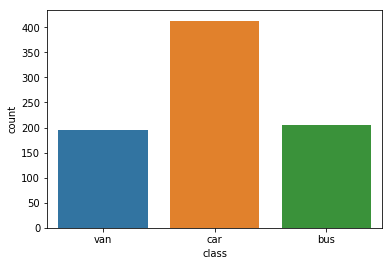

In [7]:
sns.countplot(df['class'])

### Check for any missing values in the data 

In [8]:
print("Number of missing/null values : \n",df.isnull().sum())

Number of missing/null values : 
 compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [9]:
from scipy.stats import zscore

In [10]:
X=df.drop(['class'],axis=1) # Independent variables
y=df['class'] # dependent variable

In [11]:
X_Scaled=X.apply(zscore)
X_Scaled

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [12]:
cluster_error=np.array([], dtype=np.float64)

In [13]:
cluster_error

array([], dtype=float64)

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [14]:
cluster_range = range( 1, 11)
cluster_error = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_Scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_error": cluster_error } )
clusters_df[0:10]

,num_clusters,cluster_error
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.286384
4,5,5192.924772
5,6,4706.433256
6,7,4350.686420
7,8,4087.480072
8,9,3867.629387
9,10,3659.830046


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

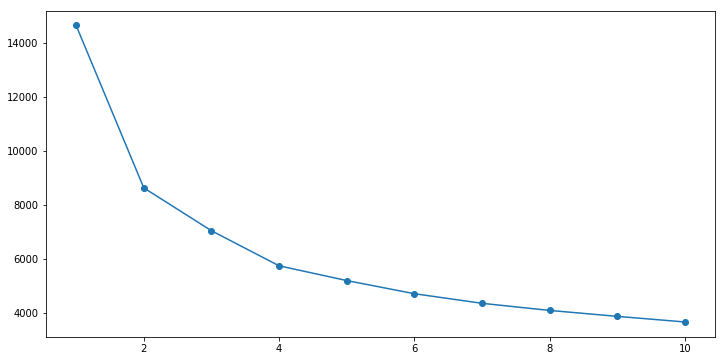

In [15]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_error, marker = "o" )

### Find out the optimal value of K

In [16]:
errors = clusters_df['cluster_error']

In [17]:
for i in range(9):
    print(errors[i+1]-errors[i])

-6010.863024013561
-1585.6695813683682
-1298.1810107914353
-546.3616118212294
-486.4915159715338
-355.7468360894527
-263.20634751208445
-219.85068509949406
-207.79934143515584


In [18]:
print("Optimal value of K = 4") # Since there is no significant drop of errors after K=4

Optimal value of K = 4


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [19]:
# Number of clusters
kmeans = KMeans(n_clusters=4)
# kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
# Fitting the input data
kmeans = kmeans.fit(X_Scaled)
# Getting the cluster labels
labels = kmeans.predict(X_Scaled)


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [20]:
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-8.73939377e-01 -4.90666958e-01 -8.19987596e-01 -1.00914774e+00
  -4.88356546e-01 -2.75961304e-01 -7.59559699e-01  8.28143534e-01
  -7.31863992e-01 -4.54863559e-01 -7.72863866e-01 -7.64634145e-01
  -3.79292105e-01  6.60977993e-01 -1.09968514e-01 -2.97172612e-01
  -9.41479276e-01 -9.74511472e-01]
 [ 1.15736176e+00  1.18688991e+00  1.21376707e+00  9.73764988e-01
   9.46906393e-02  2.19180218e-01  1.30158336e+00 -1.21649970e+00
   1.30627647e+00  1.10069002e+00  1.20916828e+00  1.31287479e+00
   1.09370231e+00 -1.03892856e-01  1.58104393e-01  2.69747448e-01
  -1.70122247e-03  1.87217384e-01]
 [-1.77926274e-01 -6.12019616e-01 -2.97587802e-01  2.04512354e-02
   2.01668080e-01 -1.80273603e-01 -4.31799185e-01  2.86319889e-01
  -4.63195107e-01 -5.74020947e-01 -3.97747522e-01 -4.35651397e-01
  -6.41055881e-01 -7.09095913e-01 -2.86420482e-02  5.37687678e-02
   9.63652967e-01  8.14107010e-01]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [21]:
colnames = X_Scaled.columns

Hint: Use pd.Dataframe function 

In [22]:
Centroids_df = pd.DataFrame(centroids, columns= colnames)
Centroids_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.873939,-0.490667,-0.819988,-1.009148,-0.488357,-0.275961,-0.759560,0.828144,-0.731864,-0.454864,-0.772864,-0.764634,-0.379292,0.660978,-0.109969,-0.297173,-0.941479,-0.974511
1,1.157362,1.186890,1.213767,0.973765,0.094691,0.219180,1.301583,-1.216500,1.306276,1.100690,1.209168,1.312875,1.093702,-0.103893,0.158104,0.269747,-0.001701,0.187217
2,-0.177926,-0.612020,-0.297588,0.020451,0.201668,-0.180274,-0.431799,0.286320,-0.463195,-0.574021,-0.397748,-0.435651,-0.641056,-0.709096,-0.028642,0.053769,0.963653,0.814107
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### Use kmeans.labels_ function to print out the labels of the classes

In [23]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
print(df_labels)

    labels
0        2
1        2
2        1
3        2
4        3
5        2
6        2
7        2
8        2
9        2
10       2
11       0
12       2
13       1
14       0
15       2
16       1
17       0
18       0
19       2
20       2
21       1
22       2
23       0
24       1
25       1
26       0
27       0
28       2
29       2
..     ...
783      0
784      1
785      1
786      2
787      0
788      1
789      2
790      1
791      1
792      0
793      2
794      1
795      0
796      0
797      2
798      2
799      1
800      0
801      0
802      1
803      0
804      2
805      2
806      2
807      2
808      2
809      2
810      1
811      2
812      0

[813 rows x 1 columns]


In [24]:
# print(kmeans.labels_)

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [25]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [26]:
print(a.shape)
print(b.shape)
print(c.shape)

(100, 2)
(50, 2)
(100, 2)


In [27]:
# np.concatenate([a,b,c])

In [28]:
df=pd.DataFrame(np.concatenate([a,b,c]))
df.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

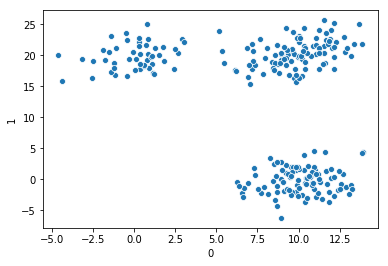

In [29]:
sns.scatterplot(x=0,y=1,data=df)

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

df_scaled = df.apply(zscore)

Z = linkage(df_scaled, method='ward',metric='euclidean')
print("Linkage Matrix Shape\n",Z.shape)
print("\n\nLinkage Matrix \n",Z)


Linkage Matrix Shape
 (249, 4)


Linkage Matrix 
 [[1.59000000e+02 2.47000000e+02 7.04832807e-03 2.00000000e+00]
 [6.00000000e+00 3.50000000e+01 7.82142991e-03 2.00000000e+00]
 [1.90000000e+02 2.14000000e+02 8.66729222e-03 2.00000000e+00]
 [6.60000000e+01 7.30000000e+01 1.13813227e-02 2.00000000e+00]
 [1.75000000e+02 2.33000000e+02 1.14011069e-02 2.00000000e+00]
 [2.30000000e+01 9.70000000e+01 1.14936105e-02 2.00000000e+00]
 [1.50000000e+01 5.50000000e+01 1.15601689e-02 2.00000000e+00]
 [1.83000000e+02 2.30000000e+02 1.15756161e-02 2.00000000e+00]
 [5.20000000e+01 9.80000000e+01 1.18562039e-02 2.00000000e+00]
 [1.84000000e+02 1.92000000e+02 1.55447235e-02 2.00000000e+00]
 [8.00000000e+00 1.90000000e+01 1.90779267e-02 2.00000000e+00]
 [1.22000000e+02 1.43000000e+02 2.15202768e-02 2.00000000e+00]
 [2.60000000e+01 2.58000000e+02 2.39421647e-02 3.00000000e+00]
 [0.00000000e+00 9.00000000e+00 2.44227864e-02 2.00000000e+00]
 [1.60000000e+02 2.59000000e+02 2.47784169e-02 3.00000000e+00]
 [1.2

### 12. Plot the dendrogram for the consolidated dataframe

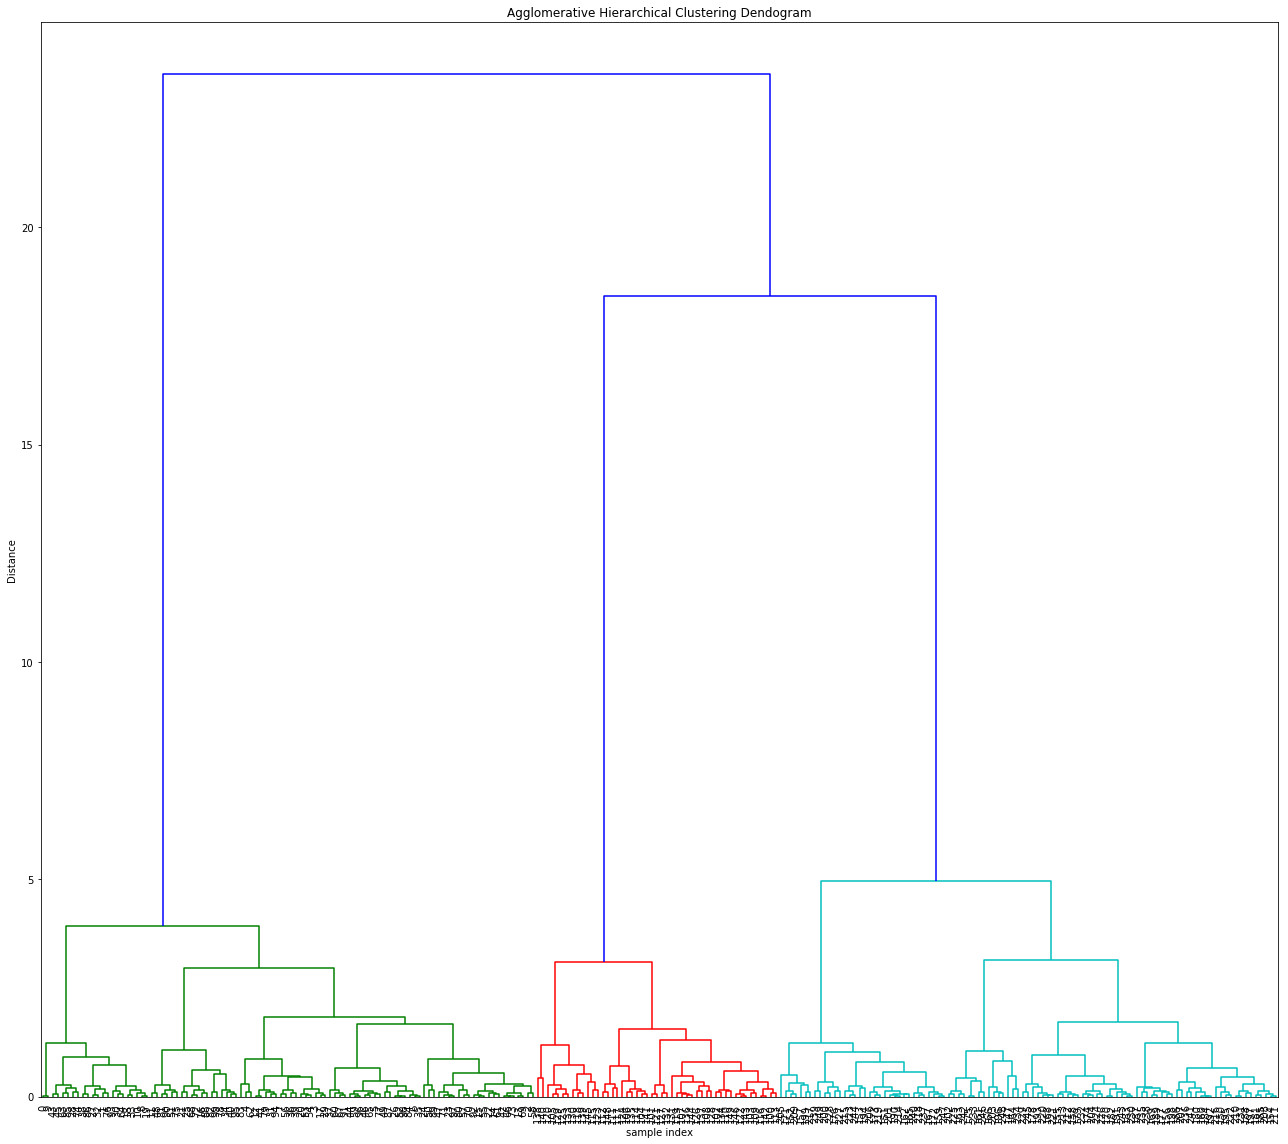

In [31]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

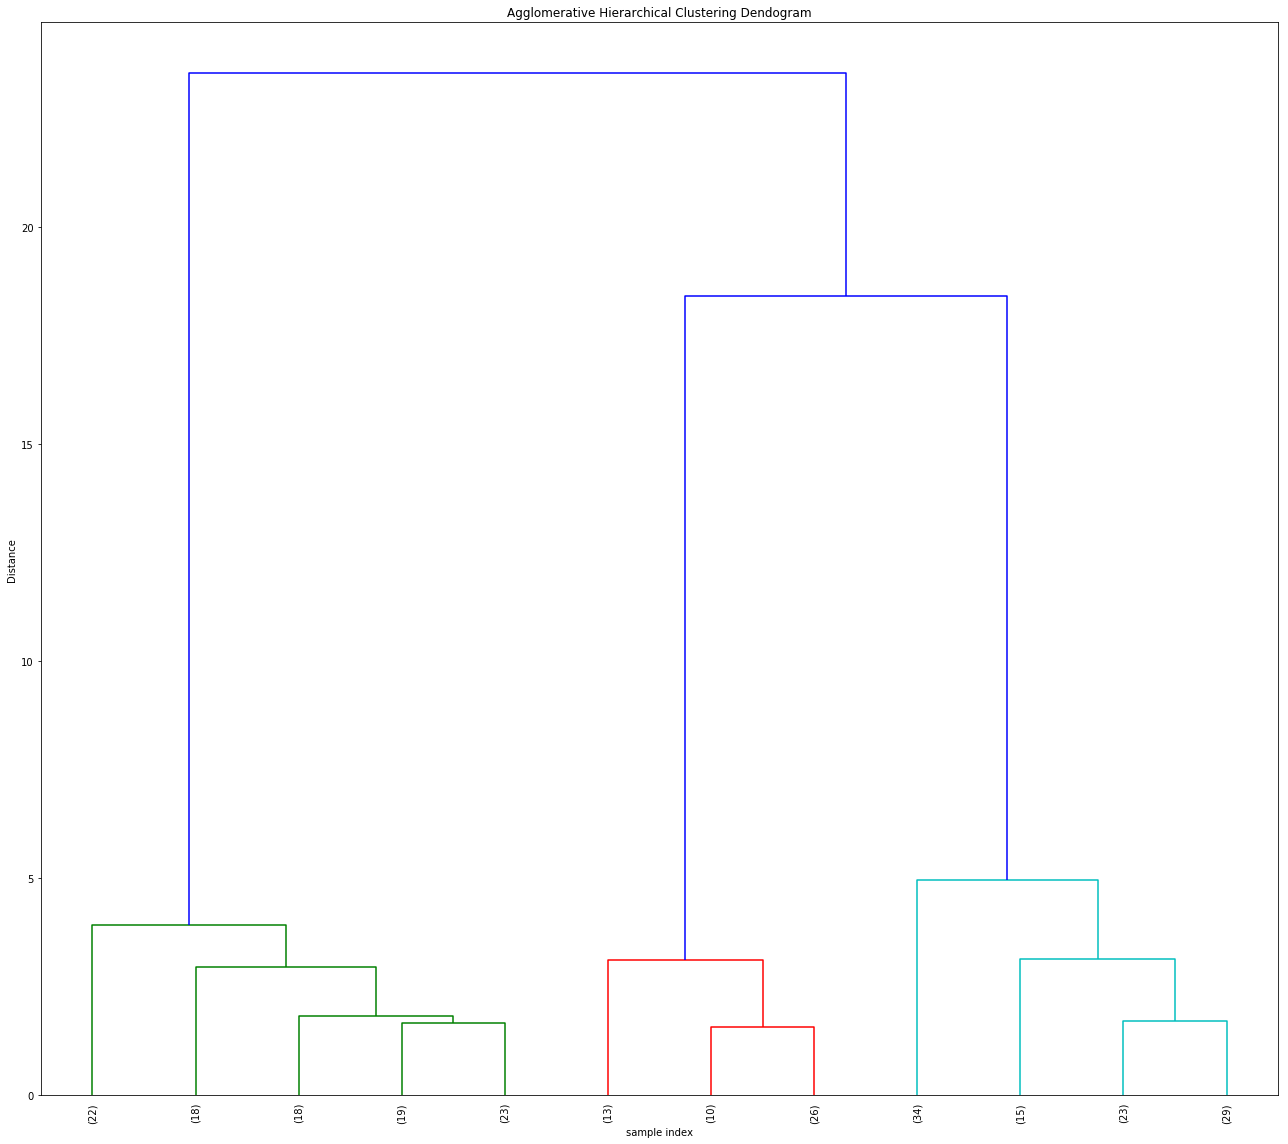

In [32]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')

dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [33]:
print("The optimal distance between clusters = 3") # Based on distance measure

The optimal distance between clusters = 3


### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [34]:
Fcluster=fcluster(Z, t=6, criterion='distance')

In [35]:
Fcluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [36]:
df=pd.DataFrame(Fcluster)

In [37]:
df.astype('category').head(10)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [38]:
df.dtypes

0    int32
dtype: object

In [39]:
df.shape

(250, 1)

In [40]:
# df_new=df_scaled.join(df)
df_new=pd.concat([df_scaled, df],axis=1)
df_new.columns=['x','y','z'] # Renaming col names
df_new

,x,y,z
0,1.340744,-0.742754,1
1,0.835221,-1.055437,1
2,0.519579,-1.035978,1
3,0.409292,-1.378463,1
4,0.145468,-1.598963,1
5,0.406242,-1.036445,1
6,0.266416,-1.083914,1
7,0.492666,-1.421520,1
8,1.094515,-1.301438,1
9,1.331241,-0.765252,1


### Use matplotlib to visually observe the clusters in 2D space 

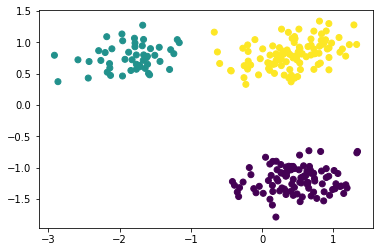

In [41]:
plt.scatter(df_new['x'],df_new['y'],c=df_new['z'])